# Introduccion a Seaborn

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from numpy import median

In [3]:
df = pd.read_csv('countries-of-the-world.csv')

In [11]:
gdp = list(df['GDP ($ per capita)'])
#gdp es el numero de todos los bienes y servicios producidos en un año en dolares por persona

percent_literate = list(df['Literacy (%)'])
# porcentaje de la poblacion que saban hablar y escribir

phones = list(df['Phones (per 1000)'])
# numero de telefono celulares por cada 1000 personas en cada pais

Para hacer un gráfico de dispersión, lo hacemos de la siguiente manera

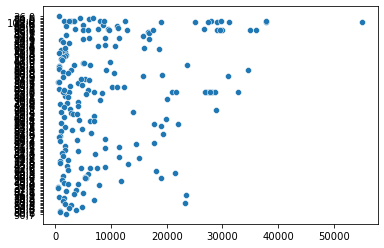

In [12]:
sns.scatterplot(x=gdp, y=percent_literate)

plt.show()

Podemos crear un gráfico de barras para contar el numero de veces que algo aparece con un sns.countplot()

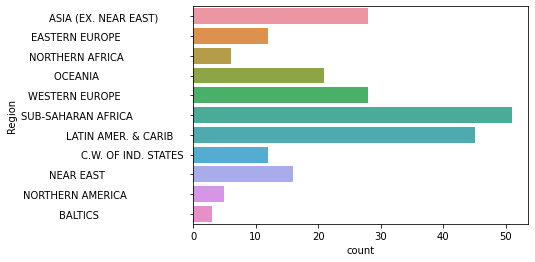

In [17]:
sns.countplot(y=df['Region'])

plt.show()

La forma más común de usar pandas con seaborn es de la siguiente manera

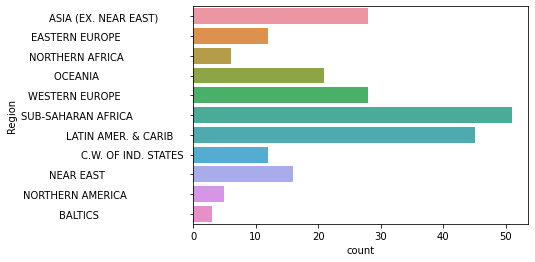

In [20]:
sns.countplot(y='Region', data=df)

plt.show()

## Parámetro hue

Este parámetro nos permite crear subgrupos dentro de las gráficas hechas por seaborn

In [24]:
student_data = pd.read_csv('student-alcohol-consumption.csv')

Haremos un grafico de dispersion del numero de faltas que tienen los alumnos y su calificacion final en el curso y si está realcionado con donde viven

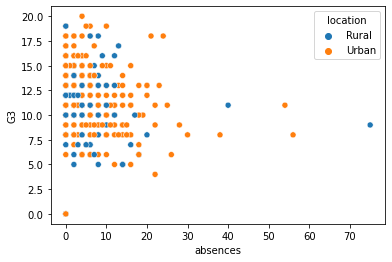

In [25]:
sns.scatterplot(x="absences", y="G3", data=student_data, hue="location",hue_order=['Rural','Urban'])
# el parametro hue_order hace que aparezca primero rural y urban en la leyenda del gráfico

plt.show()

Podemos cambiar los colores del gráfico con el parámetro palette, este parámetro necesita un diccionario para que funcione, de igual manera, acepta que el diccionario contenga la clave hexadecimal

<AxesSubplot:xlabel='school', ylabel='count'>

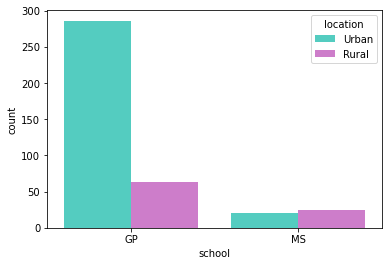

In [27]:
palette_colors = {'Rural': "#DA70D6", 'Urban': "#40E0D0"}

sns.countplot(x='school', data=student_data, hue='location', palette=palette_colors)

## Método .relplot()

Se usa para diagramas relacionales, es decir, en donde dos o más variables cuantitativas pueden estar o no relacionadas

En el gráfico de dispersión anterior, vimos que los alumnos que mas faltan tienden a tener peores calificaciones, veamos que tanto tiene que ver las horas de estudio, para esto, usaremos el método .relplot(), que nos permite añadir mas variantes a los gráficos que imprimimos

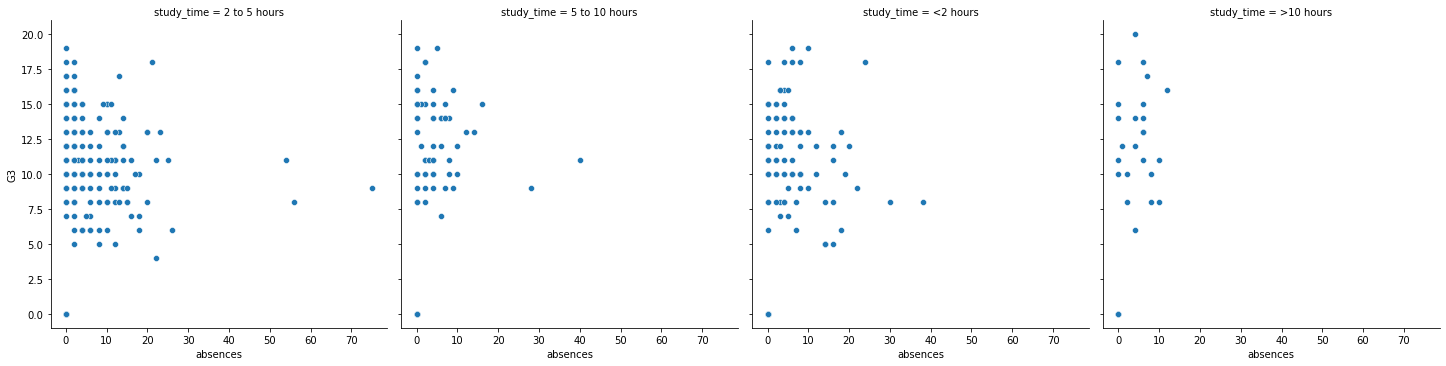

In [29]:
sns.relplot(x="absences", y="G3", data=student_data, kind="scatter", col="study_time")
# en el parámetro col, indicamos que queremos que los gráficos se dividan según los valores que aparecen en la columna 'study_time'
# este parámetro tambiés podía ser reemplazado por row o hacer una combinación de ambos, lo cual producirá los gráficos de 
# todas las combinaciones posibles entre los datos
# en caso de haber tomado solo el parámetro row, los gráficos hubieran aparecido de manera vertical

plt.show()

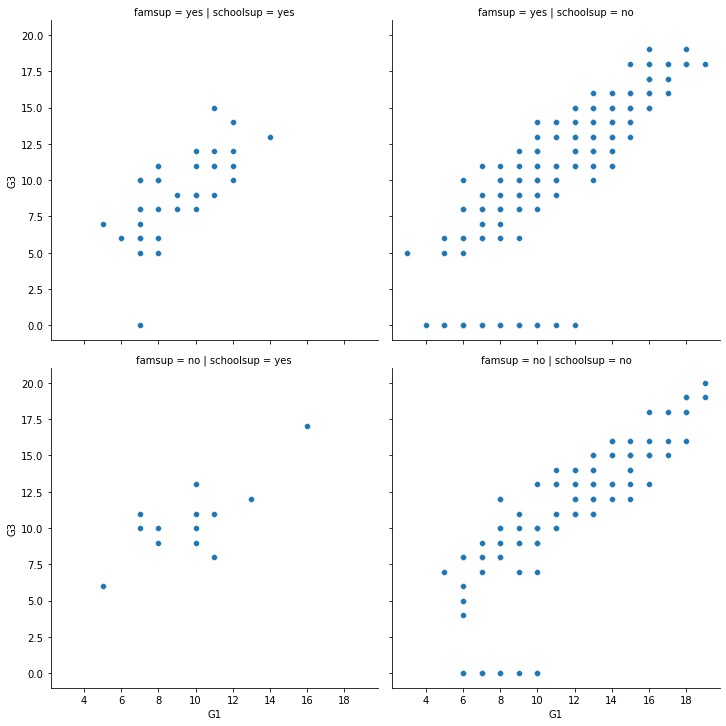

In [30]:
sns.relplot(x="G1", y="G3", data=student_data, kind="scatter", col="schoolsup", col_order=["yes", "no"], row='famsup', row_order=['yes','no'])
# el parametro col_order indica el orden en el que queremos que aparezcan los gráficos según el valor de la columna

plt.show()

In [31]:
mpg = pd.read_csv('mpg.csv')

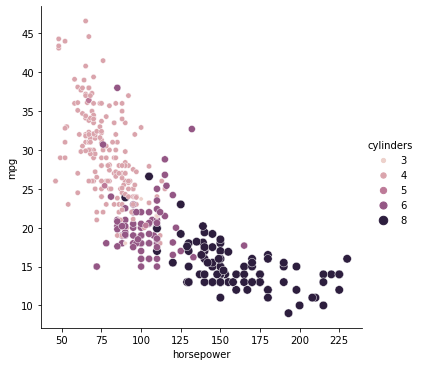

In [32]:
sns.relplot(x="horsepower", y="mpg", data=mpg, kind="scatter", size="cylinders", hue='cylinders')
# en el parámetro size indicamos el tamaño de los puntos según la columna de cylinders

plt.show()

De este gráfico de dispersión, podemos notar que entre mayor sean los caballos de fuerza, menor es el numero de galones por milla. Además, estos autos cuentan con un número mayor de cilindros

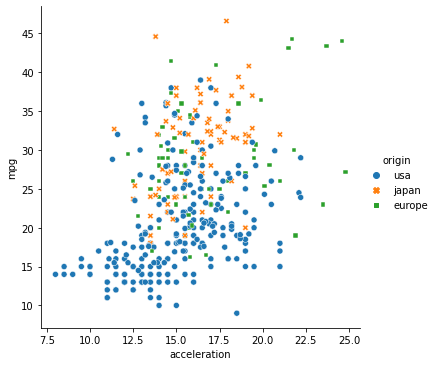

In [33]:
sns.relplot(x='acceleration', y='mpg', data=mpg, kind='scatter', hue='origin', style='origin')
# en este caso la variable de aceleration es el tiempo en que se acelera de 0 a 60 millas por hora en segundos
# mayor es el número indica menor aceleracion

# el parámetro style hace que se cambie el diseño de los puntos según los valores de la columna seleccionada
plt.show()

### Introducción a los gráficos de lineas

Cuando trabajamos con graficos de lineas, cuando indicamos los valores que van a estar en el eje x, algunos de estos pueden estar repetidos, entonces el gráfico de líneas imprime la media de los datos y una región sobreada al rededor de esta, dicha área sombreada es un intervalo de confianza con un 95% de certeza, para esto, la gráfica asume que nuestros datos son una muestra aleatoria de todos los autos en US, Europe y Japón

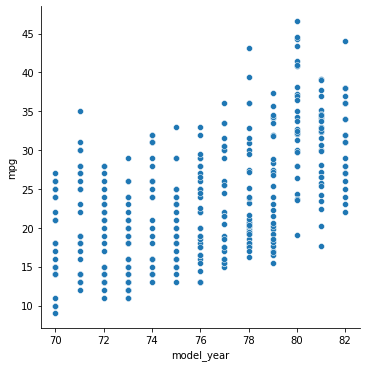

In [37]:
# el gráfico de dispersión se vería de la siguiente manera

sns.relplot(x='model_year', y='mpg',data=mpg, kind='scatter')

plt.show()

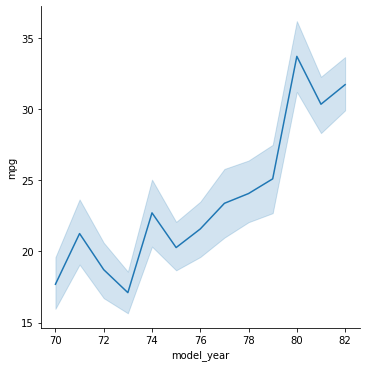

In [34]:
sns.relplot(x='model_year', y='mpg',data=mpg, kind='line')

plt.show()

Podemos cambiar este intervalo de confianza por la desviación estándar de los datos, indicando el parámetro ci='sd'

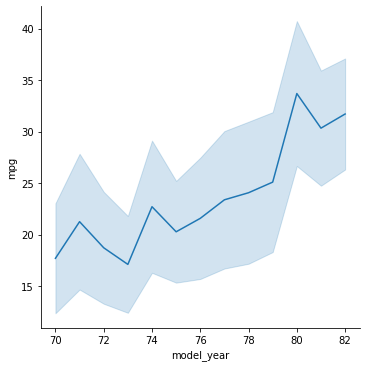

In [35]:
sns.relplot(x="model_year", y="mpg", data=mpg, kind="line", ci='sd')

plt.show()

De igual manera que con los gráficos de disperción, podemos imprimir las gráficas de subgrupos de datos, indicando el parámetro hue.

Por otra parte, podemos quitar el area del intervalo de confianza, indicando el parámetro ci=None

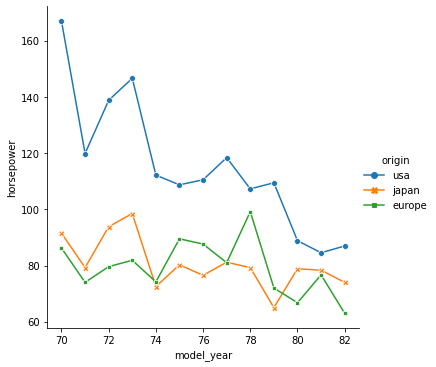

In [38]:
sns.relplot(x="model_year", y="horsepower", data=mpg, kind="line", ci=None, style="origin", hue="origin", markers=True, dashes=False)
# como su nombre lo indica, añadimos marcadores con el parámetro markers=True
# Sin embargo, markers=True nos cambia el estilo de línea, para volver a tener lineas normales con los marcadores 
# usamos el parámetro dashes=False

plt.show()

## Método catplot()

Con este método podremos crear gráficos de barras y gráficos de conteo, es decir, diagramas categoricos

In [49]:
survey_data = pd.read_csv('young-people-survey-responses.csv')
Age_category = ['less than 21' if x <= 21 else '21 +' for x in survey_data['Age']]
survey_data['Age_category'] = Age_category

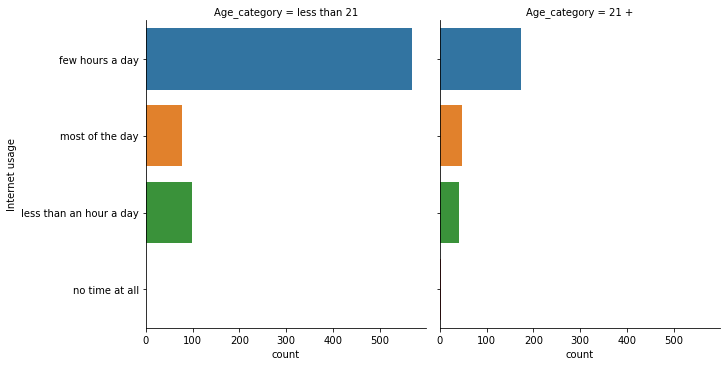

In [50]:
sns.catplot(y="Internet usage", data=survey_data, kind="count", col='Age_category')
# creamos un gráfico de conteo, divididos según los valores de la columna Age Category

plt.show()

Ahora crearemos un gráfico de barras para ver que género está más interesado en matemáticas, esto lo haremos con un gráfico de barras para ver que porcentaje de los encuestados dijeron que si y si son hombres o mujeres

In [52]:
#sns.catplot(x='Gender', y='Interested in Math', data=survey_data, kind='bar')

#plt.show()

# este gráfico nos daría un porcentaje de las poblaciones que dijeron que si

Ahora queremos ver la relación entre las horas de estudio y los grados finales

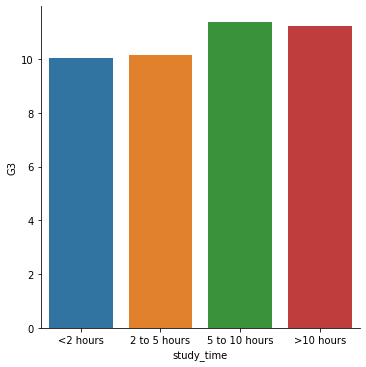

In [53]:
sns.catplot(x="study_time", y="G3", data=student_data, kind="bar",
            order=["<2 hours", 
                   "2 to 5 hours", 
                   "5 to 10 hours", 
                   ">10 hours"],
            ci=None)
# en el parámetro order, ordenamos las columnas de la gráfica para que salgan en ese orden
# Show plot
plt.show()

# notamos que si hay una relación, sin embargo no es una fuerte relacion

## Box Plot

Usaremos el método .catplot(), indicando en el parámetro x el nombre de la variable categórica y en el eje y ponemos el nombre de la variable cuantitativa, además especificaremos el parámetro kind='box'

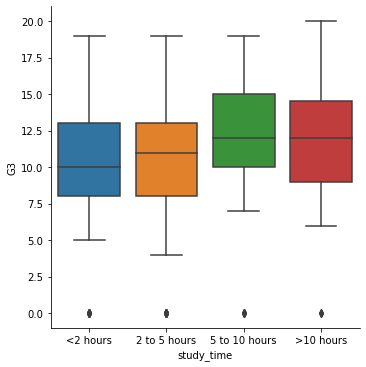

In [54]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x='study_time', y='G3', data=student_data, kind='box', order=study_time_order)

# Show plot
plt.show()

Los bigotes del boxplot empiezan y terminan a 1.5 veces el rango intercuartilico, las lineas de la caja representan el percentil 25 y 75 respectivamente y la línea de en medio representa la media de los datos

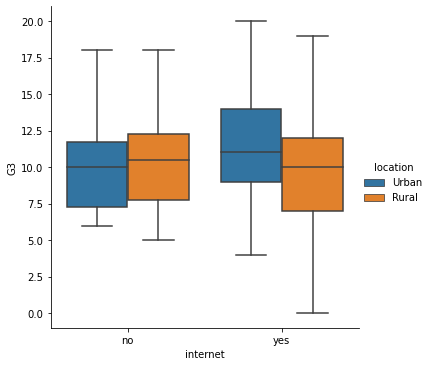

In [55]:
sns.catplot(x='internet', y='G3', data=student_data, kind='box', hue='location', sym='')
# en este caso, omitimos los outliers indicando el parámetro sym='' y creamos gráficos según los valores de location

plt.show()

En el boxplot tambien podemos editar hasta donde queremos que los bigotes de la gráfica se posicionen, utilizando el parámetro whis

si tomamos whis=2.0 los bigotes apareceran 2 veces el rango inter cuartilico

si tomamos whis=[0,100] los bigotes apareceran desde el minimo al máximo de los datos ordenados

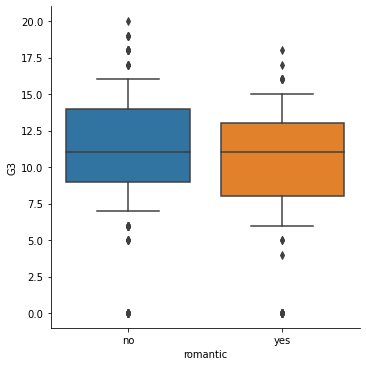

In [56]:
sns.catplot(x="romantic", y="G3", data=student_data, kind="box", whis=0.5)
# aqui pedimos que los bigotes esten a 0.5 veces el rango intercuartilico

plt.show()

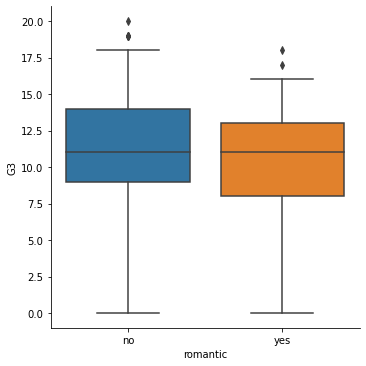

In [57]:
sns.catplot(x="romantic", y="G3", data=student_data, kind="box", whis=[5, 95])
# aqui tomamos los bigotes desde el percentil 5 hasta el percentil 95

plt.show()

## Graficos de puntos

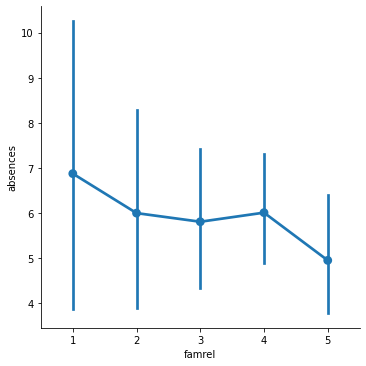

In [58]:
# en este caso la variable famrel nos mide la calidad de la relacion con su familia 1 es mala 5 muy buena
sns.catplot(x="famrel", y="absences",data=student_data, kind="point")
        
plt.show()

Al igual que los graficos de barras, este grafico nos muestra la media de la muestra con los puntos y las lineas verticales nos indican el error, el cual, si suponemos que los datos provienen de una muestra aleatoria de toda la poblacion tendrían una certeza del 95%

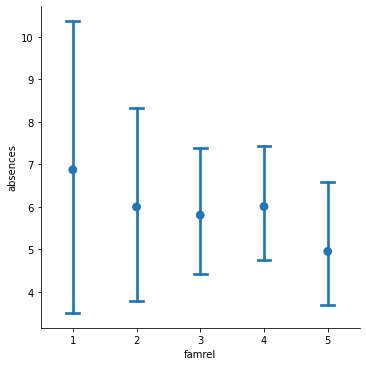

In [59]:
sns.catplot(x="famrel", y="absences", data=student_data, kind="point", capsize=0.2, join=False)
# en este grafico, los parametros capsize = 0.2 añaden una linea en los intervalos de confianza y el parametro join 
# hace que las lineas que unen los puntos no aparezcan

plt.show()

Mientras que el numero de faltas es ligeramente mas pequeño entre estudiantes con una buena relacion con su familia, los largos intervalos de confianza nos dicen que no podemos asegurar que hay una relacion entre si

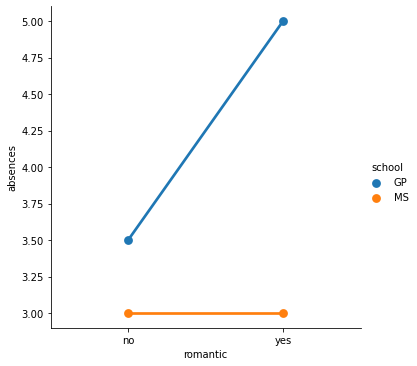

In [61]:
sns.catplot(x="romantic", y="absences", data=student_data, kind="point", hue="school", ci=None, estimator=median)
# en el parámetro ci=None, quitamos los intervalos de confianza
# como hay muchos valores atipicos, podemos cambiar el estimador a la media que importamos de numpy

plt.show()

Parece que los estudiantes en relaciones amorosas tienen un promedio y media mayor de ausencias en las ecuelas GP, pero esta asociacion no se presenta en los estudiantes que van a las escuelas MS

## Personalizando graficos

Podemos cambiar el fondo de los gráficos usando el metodo sns.set_style() y podemos cambiar la paleta de colores con sns.set_palette()

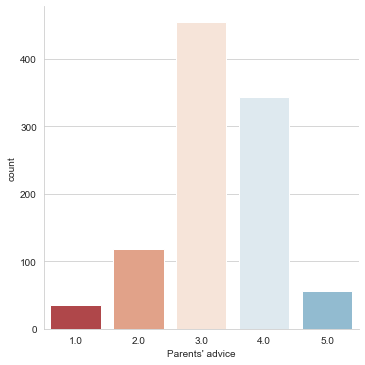

In [71]:
sns.set_style("whitegrid")  # establecemos las lineas 
sns.set_palette("RdBu")     # cambiamos los colores

sns.catplot(x="Parents' advice", data=survey_data, kind="count")

plt.show()

Podemos incrementar el tamaño de letra de la escala, usando sns.set_context(), donde los posibles valores son 'paper', 'notebook', 'talk' y 'poster', donde cada uno es mas grande que el otro

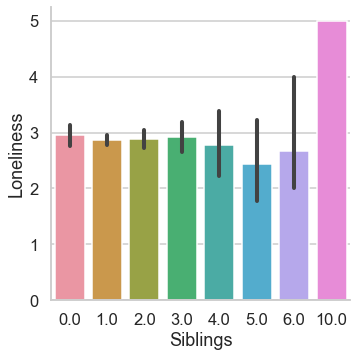

In [75]:
sns.set_context("talk")

sns.catplot(x="Siblings", y="Loneliness", data=survey_data, kind="bar")

plt.show()

Podemos tambien usar nuestra propia paleta de colores

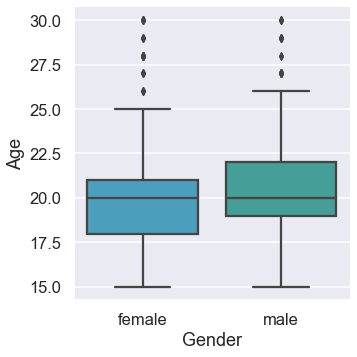

In [76]:
sns.set_style('darkgrid')

# Aqui escogemos los colores que queremos
sns.set_palette(["#39A7D0", "#36ADA4"])

sns.catplot(x="Gender", y="Age", data=survey_data, kind="box")

plt.show()

## Titulos y etiquetas (parte 1)

Para poder añadir etiquetas y titulos a los graficos, debemos saber el tipo del gráfico, si es FacetGrid o AxesSubplot. los que se encuentran en FacetGrid destancan relplot() y catplot() y se caracterizan por poder crear varios subgráficos. por otra parte, los AxesSubplot destancan scatterplot(), countplot(), etc y solo puede crear una sola gráfica

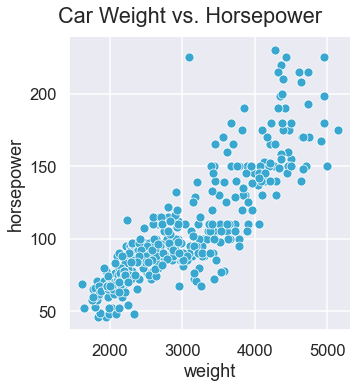

In [84]:
g = sns.relplot(x="weight", y="horsepower", data=mpg, kind="scatter")

# como se trata de una clase FacetGrid, para añadir el titulo lo hacemos así
# los parametros x,y sirven para poder mover el titulo
g.fig.suptitle("Car Weight vs. Horsepower", y=1.03, x=0.5)

plt.show()

[Text(0.5, 0, 'Car Model Year'), Text(0, 0.5, 'Average MPG')]

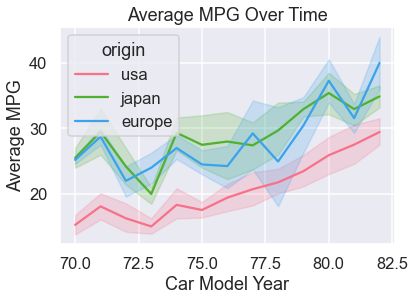

In [87]:
g = sns.lineplot(x="model_year", y="mpg", data=mpg, hue="origin")

# ponemos un titulo, como se trata de una clase AxesSubplot, lo hacemos asi
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year",
ylabel="Average MPG")

En el grafico pasado, el metodo para nombrar los ejes funciona para ambos tipos de grafico

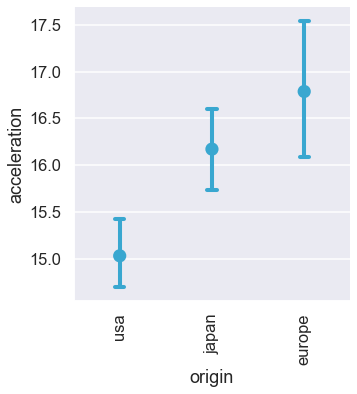

In [88]:
sns.catplot(x="origin", y="acceleration", data=mpg, kind="point", join=False, capsize=0.1)

# Rotamos las etiquetas del eje x invocando plt
plt.xticks(rotation=90)

plt.show()